In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess


corpus = [
    "Artificial intelligence is transforming the world",
    "Machine learning is a subset of artificial intelligence",
    "Deep learning is a part of machine learning",
    "Neural networks are used in deep learning",
    "Data science uses machine learning techniques",
    "Artificial intelligence and data science are related fields",
]


tokenized_corpus = [simple_preprocess(sentence) for sentence in corpus]

print(tokenized_corpus)


[['artificial', 'intelligence', 'is', 'transforming', 'the', 'world'], ['machine', 'learning', 'is', 'subset', 'of', 'artificial', 'intelligence'], ['deep', 'learning', 'is', 'part', 'of', 'machine', 'learning'], ['neural', 'networks', 'are', 'used', 'in', 'deep', 'learning'], ['data', 'science', 'uses', 'machine', 'learning', 'techniques'], ['artificial', 'intelligence', 'and', 'data', 'science', 'are', 'related', 'fields']]


In [ ]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,    
    window=3,         
    min_count=1,      
    workers=1,
    sg=1              
)


In [3]:
vector_ai = model.wv['intelligence']
print("Embedding for 'intelligence':")
print(vector_ai)


Embedding for 'intelligence':
[ 1.56626012e-02 -1.90336015e-02 -4.29509033e-04  6.92814263e-03
 -1.88683020e-03  1.67703331e-02  1.80408936e-02  1.30929491e-02
 -1.42254087e-03  1.54167572e-02 -1.70653500e-02  6.42585708e-03
 -9.26423818e-03 -1.01663833e-02  7.18011661e-03  1.07343886e-02
  1.55626079e-02 -1.15104504e-02  1.48680145e-02  1.32248709e-02
 -7.41235679e-03 -1.75079238e-02  1.08938171e-02  1.30384210e-02
 -1.57441024e-03 -1.34289972e-02 -1.41866999e-02 -4.99270717e-03
  1.02815069e-02 -7.33240135e-03 -1.87417399e-02  7.67781213e-03
  9.77588631e-03 -1.28525691e-02  2.40353844e-03 -4.15439857e-03
  4.99806520e-05 -1.97817925e-02  5.37534663e-03 -9.53311566e-03
  2.17495742e-03 -3.16383666e-03  4.40977653e-03 -1.57848150e-02
 -5.41198906e-03  5.34659531e-03  1.06935380e-02 -4.81359521e-03
 -1.90375708e-02  9.00169089e-03]


In [4]:
similar_words = model.wv.most_similar('learning', topn=5)
print(similar_words)


[('neural', 0.27055710554122925), ('uses', 0.21060103178024292), ('transforming', 0.18602196872234344), ('related', 0.16704076528549194), ('the', 0.16078656911849976)]


In [5]:
similarity = model.wv.similarity('artificial', 'intelligence')
print("Similarity:", similarity)


Similarity: -0.20472564


In [6]:
result = model.wv.most_similar(
    positive=['deep', 'intelligence'],
    negative=['artificial'],
    topn=3
)

print(result)


[('fields', 0.17260487377643585), ('transforming', 0.1519705206155777), ('and', 0.08390888571739197)]


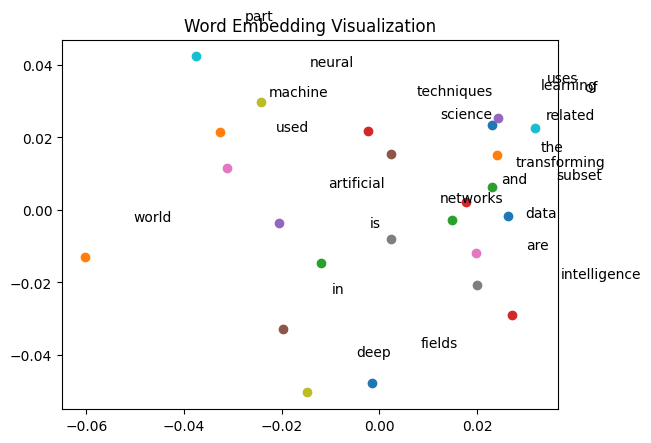

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
word_vectors = model.wv[words]


pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)


plt.figure()
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, word)

plt.title("Word Embedding Visualization")
plt.show()


In [8]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,   
    window=2,         
    min_count=1,    
    workers=1,
    sg=0              
)


In [9]:
vector_learning = model.wv['learning']
print("Embedding for 'learning':")
print(vector_learning)


Embedding for 'learning':
[-1.08480616e-03  4.71656123e-04  1.01935165e-02  1.80192813e-02
 -1.85974278e-02 -1.42213330e-02  1.29153319e-02  1.79579109e-02
 -1.00483401e-02 -7.51485722e-03  1.47610735e-02 -3.06885294e-03
 -9.07825772e-03  1.31258881e-02 -9.72281210e-03 -3.63437738e-03
  5.75995306e-03  2.00562528e-03 -1.65701713e-02 -1.89238358e-02
  1.46229127e-02  1.01276971e-02  1.35308374e-02  1.52453291e-03
  1.27123948e-02 -6.81293570e-03 -1.88744115e-03  1.15481699e-02
 -1.50603848e-02 -7.87600596e-03 -1.50012234e-02 -1.85660250e-03
  1.90703198e-02 -1.46428347e-02 -4.67402535e-03 -3.87974549e-03
  1.61519088e-02 -1.18522337e-02  9.37857913e-05 -9.51150339e-03
 -1.92010552e-02  1.00050438e-02 -1.75337270e-02 -8.77296552e-03
 -5.85947928e-05 -5.85958944e-04 -1.53259588e-02  1.92223564e-02
  9.96753387e-03  1.84581988e-02]


In [10]:
similar_words = model.wv.most_similar('learning', topn=5)
print("Words similar to 'learning':")
print(similar_words)


Words similar to 'learning':
[('neural', 0.2707112431526184), ('uses', 0.21054990589618683), ('transforming', 0.1861463487148285), ('related', 0.16719099879264832), ('the', 0.16070358455181122)]


In [11]:
similarity = model.wv.similarity('artificial', 'intelligence')
print("Similarity score:", similarity)


Similarity score: -0.20593458


In [12]:
result = model.wv.most_similar(
    positive=['deep', 'intelligence'],
    negative=['artificial'],
    topn=3
)

print(result)


[('fields', 0.1723526120185852), ('transforming', 0.15208745002746582), ('and', 0.08396696299314499)]
